In [ ]:
!pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import BayesianEstimator
from tensorflow import keras
from tensorflow.keras import layers, models
import tensorflow as tf
from sklearn import preprocessing
from sklearn.compose import make_column_transformer
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [ ]:
df = pd.read_csv("WineQT.csv")

## Evaluación general del dataset

A simple yet challenging project, to anticipate the quality of wine.
The complexity arises due to the fact that the dataset has fewer samples, & is highly imbalanced.
Can you overcome these obstacles & build a good predictive model to classify them?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


Para evaluar si existen columnas que aporten poca información, se realiza una matriz de correlación

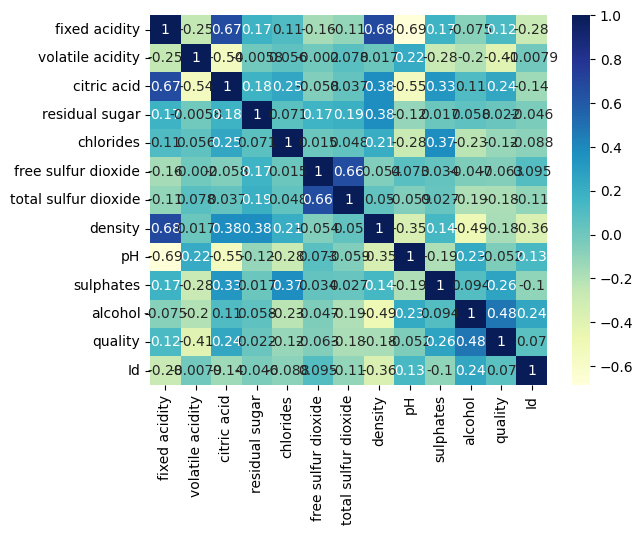

In [ ]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

No hay variables altamente correlacionadas con otras..

In [ ]:
n_datos_clases = df["quality"].value_counts()
n_datos_clases

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

Aquí se nota que no es balanceado el dataset :(

In [ ]:
df = df.drop("Id", axis=1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
calidad_7_data = df[df['quality'] == 7]
data_point7 = calidad_7_data.sample(n=1)
data_point_index7 = data_point7.index[0]
df = df.drop(data_point_index7)
siete_features = data_point7.drop(columns=['quality'])

calidad_4_data = df[df['quality'] == 4]
data_point4 = calidad_4_data.sample(n=1)
data_point_index4 = data_point4.index[0]
df = df.drop(data_point_index4)
cuatro_features = data_point4.drop(columns=['quality'])

calidad_3_data = df[df['quality'] == 4]
data_point3 = calidad_3_data.sample(n=1)
data_point_index3 = data_point3.index[0]
df = df.drop(data_point_index3)
cuatro_features2 = data_point3.drop(columns=['quality'])

#Creación Datos con VAE y Slerp


In [ ]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

In [ ]:
class Sampling(layers.Layer):

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [ ]:
df_copia = df.copy()

Separamos la variable objetivo del dataset, para lo que se crea X e y. Después, filtramos la data que nos va a servir para Luego creamos las particiones de X e y en train y test para utilizarlos en VAE.


In [ ]:
over = SMOTE(sampling_strategy={3: 100, 4: 100, 8: 100})
under = RandomUnderSampler(sampling_strategy={5: 300, 6: 300})
steps = [
    ('over', over),
    ('under', under)
]

pipeline = Pipeline(steps=steps)
X, y = pipeline.fit_resample(df.iloc[:,:-1], df.iloc[:,-1])
df = pd.concat([X,y], axis=1)

In [ ]:
#df2 = df.copy()

In [ ]:
filtered_data_menores = df[y.isin([3, 4])]
X_filtered_menores = filtered_data_menores.drop("quality", axis=1)
y_filtered_menores = filtered_data_menores["quality"]

filtered_data_mayores = df[y.isin([7, 8])]
X_filtered_mayores = filtered_data_mayores.drop("quality", axis=1)
y_filtered_mayores = filtered_data_mayores["quality"]

filtered_data = df[y.isin([3, 4, 7, 8])]
X_filtered = df.drop("quality", axis=1)
y_filtered = df["quality"]

X, y son los valores del dataset original luego de haber hecho oversampling y undersampling de (5,6) y (3,4,8) respectivamente. Es decir, esto lo hacemos sin SLERP

In [ ]:
min_max = preprocessing.MinMaxScaler()
X_scaled = min_max.fit_transform(X) #Hacemos esto para entrenar VAE con datos normalizados

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_validacion, y_train, y_validacion = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
latent_dim = 2

# Encoder
encoder_inputs = layers.Input(shape=(X_scaled.shape[1],)) #entrenamos con scaled
x = layers.Dense(64, activation='relu')(encoder_inputs)
z_mean = layers.Dense(latent_dim)(x)
z_log_var = layers.Dense(latent_dim)(x)

# Sampling
def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    return z_mean + tf.keras.backend.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Decoder
decoder_inputs = layers.Input(shape=(latent_dim,))
x = layers.Dense(64, activation='relu')(decoder_inputs)
decoder_outputs = layers.Dense(X_scaled.shape[1], activation='sigmoid')(x)

# VAE model
encoder = models.Model(encoder_inputs, [z_mean, z_log_var, z])
decoder = models.Model(decoder_inputs, decoder_outputs)
vae_outputs = decoder(encoder(encoder_inputs)[2])
vae = models.Model(encoder_inputs, vae_outputs)

# VAE loss
reconstruction_loss = tf.keras.losses.mean_squared_error(encoder_inputs, vae_outputs)
reconstruction_loss *= df.shape[1]
kl_loss = 1 + z_log_var - tf.keras.backend.square(z_mean) - tf.keras.backend.exp(z_log_var)
kl_loss = tf.keras.backend.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = tf.keras.backend.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')
vae.summary()

# Train VAE
vae.fit(X_train, epochs=10, batch_size=32, validation_data=(X_validacion, y_validacion))

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 11)]                 0         []                            
                                                                                                  
 model_9 (Functional)        [(None, 2),                  1028      ['input_7[0][0]']             
                              (None, 2),                                                          
                              (None, 2)]                                                          
                                                                                                  
 model_10 (Functional)       (None, 11)                   907       ['model_9[0][2]']             
                                                                                           

Escalamos la las variables por Standard Scaler.

In [ ]:
#standard_scaler = preprocessing.StandardScaler()
#min_max = preprocessing.MinMaxScaler()
X_fscaled_mayores = min_max.fit_transform(X_filtered_mayores)
X_fscaled_menores = min_max.fit_transform(X_filtered_menores)
X_fscaled = min_max.fit_transform(X_filtered)

Aplicamos SLERP

In [ ]:
def slerp(val, low, high):
    omega = np.arccos(np.clip(np.dot(low / np.linalg.norm(low), high / np.linalg.norm(high)), -1, 1))
    so = np.sin(omega)
    if so == 0:
        return (1.0 - val) * low + val * high
    return np.sin((1.0 - val) * omega) / so * low + np.sin(val * omega) / so * high

z_mean_men, _, _ = encoder.predict(X_fscaled_menores)
z_mean_may, _, _ = encoder.predict(X_fscaled_mayores)

def generate_data(class_1, class_2, num_samples, target_class_label, z_mean, y, variance_factor = 0.05):
    idx_1 = np.where(y == class_1)[0] #y_filtered: da lo mismo
    idx_2 = np.where(y == class_2)[0]

    z_1 = z_mean[idx_1]
    z_2 = z_mean[idx_2]

    new_data = []
    for _ in range(num_samples):
        idx1 = np.random.choice(len(z_1))
        idx2 = np.random.choice(len(z_2))
        val = np.clip(np.random.rand() * variance_factor, 0, 1)
        #z_sample = slerp(np.random.rand(), z_1[idx1], z_2[idx2])
        z_sample = slerp(val, z_1[idx1], z_2[idx2])
        generated_sample = decoder.predict(np.array([z_sample]))[0]
        new_data.append(generated_sample)

    #new_data = min_max.inverse_transform(new_data) #aquí lo volvemos a su original: hagamos esto al final de todo
    new_labels = [target_class_label] * num_samples
    return np.array(new_data), np.array(new_labels)

new_data_2, new_labels_2 = generate_data(3, 4, 10, 2, z_mean_men, y_filtered_menores)
y_filtered_menores = np.hstack([y_filtered_menores, new_labels_2])
X_fscaled_menores = np.vstack([X_fscaled_menores, new_data_2])

z_mean_men, _, _ = encoder.predict(X_fscaled_menores)

new_data_1, new_labels_1 = generate_data(2, 3, 10, 1, z_mean_men, y_filtered_menores)
y_filtered_menores = np.hstack([y_filtered_menores, new_labels_1])
X_fscaled_menores = np.vstack([X_fscaled_menores, new_data_1])

z_mean_men, _, _ = encoder.predict(X_fscaled_menores)

new_data_0, new_labels_0 = generate_data(1, 2, 10, 0, z_mean_men, y_filtered_menores)
y_filtered_menores = np.hstack([y_filtered_menores, new_labels_0])
X_fscaled_menores = np.vstack([X_fscaled_menores, new_data_0])

#----------------------------------

new_data_9, new_labels_9 = generate_data(8, 7, 10, 9, z_mean_may, y_filtered_mayores)
y_filtered_mayores = np.hstack([y_filtered_mayores, new_labels_9])
X_fscaled_mayores = np.vstack([X_fscaled_mayores, new_data_9])

z_mean_may, _, _ = encoder.predict(X_fscaled_mayores)

new_data_10, new_labels_10 = generate_data(9, 8, 10, 10, z_mean_may, y_filtered_mayores)

1/1 [==============================] - 0s 24ms/step


In [ ]:
#def slerp(val, low, high):
#    omega = np.arccos(np.clip(np.dot(low / np.linalg.norm(low), high / np.linalg.norm(high)), -1, 1))
#    so = np.sin(omega)
#    if so == 0:
#        return (1.0 - val) * low + val * high
#    return np.sin((1.0 - val) * omega) / so * low + np.sin(val * omega) / so * high
#
#z_mean_men, _, _ = encoder.predict(X_scaled_menores) #X_filtered?
#z_mean_may, _, _ = encoder.predict(X_scaled_mayores)
#
#def generate_data(class_1, class_2, num_samples, target_class_label, z_mean, y, variance_factor = 0.05):
#    idx_1 = np.where(y == class_1)[0] #y_filtered
#    idx_2 = np.where(y == class_2)[0]  #y_filtered
#
#    z_1 = z_mean[idx_1]
#    z_2 = z_mean[idx_2]
#
#    new_data = []
#    for _ in range(num_samples):
#        idx1 = np.random.choice(len(z_1))
#        idx2 = np.random.choice(len(z_2))
#        val = np.clip(np.random.rand() * variance_factor, 0, 1)
#        #z_sample = slerp(np.random.rand(), z_1[idx1], z_2[idx2])
#        z_sample = slerp(val, z_1[idx1], z_2[idx2])
#        generated_sample = decoder.predict(np.array([z_sample]))[0]
#        new_data.append(generated_sample)
#
#    new_data = min_max.inverse_transform(new_data)
#    new_labels = [target_class_label] * num_samples
#    return np.array(new_data), np.array(new_labels)
#
#new_data_0, new_labels_0 = generate_data(3, 4, 10, 0, z_mean_men, y_filtered_menores) #no debería ser necesario usar X_filtered ya que eso solo usa los valores con label determinado
#new_data_1, new_labels_1 = generate_data(3, 4, 10, 1, z_mean_men, y_filtered_menores)
#new_data_2, new_labels_2 = generate_data(3, 4, 10, 2, z_mean_men, y_filtered_menores)
#new_data_9, new_labels_9 = generate_data(7, 8, 10, 9, z_mean_may, y_filtered_mayores)
#new_data_10, new_labels_10 = generate_data(7, 8, 10, 10, z_mean_may, y_filtered_mayores)

aquí revisamos que se hayan generado datos reales (volveos a notar la cercanía entre el dato 2 y el 10)

In [ ]:
print("Generated data for class 2:")
print(pd.DataFrame(new_data_2).head())

print("Generated data for class 10:")
print(pd.DataFrame(new_data_10).head())

print("Data for class 10:")
print(df[df.iloc[:, -1] == 4].head())

Generated data for class 2:
         0         1         2         3         4         5         6   \
0  0.356242  0.340040  0.332231  0.218571  0.218685  0.244528  0.210214   
1  0.356273  0.341059  0.332649  0.218758  0.219182  0.244075  0.209007   
2  0.356216  0.338776  0.331746  0.218381  0.218103  0.245026  0.211539   
3  0.356218  0.337937  0.331479  0.218322  0.217770  0.245253  0.212136   
4  0.356211  0.338053  0.331497  0.218307  0.217797  0.245257  0.212152   

         7         8         9         10  
0  0.469583  0.433498  0.254894  0.373732  
1  0.470109  0.434389  0.253336  0.373116  
2  0.469008  0.432491  0.256684  0.374507  
3  0.468749  0.431979  0.257636  0.375038  
4  0.468743  0.431996  0.257587  0.374960  
Generated data for class 10:
         0         1         2         3         4         5         6   \
0  0.356157  0.339692  0.331869  0.218241  0.218300  0.245101  0.211775   
1  0.356161  0.339679  0.331878  0.218255  0.218307  0.245081  0.211719   
2  

In [ ]:
new_data_2 = min_max.inverse_transform(pd.DataFrame(new_data_2))
new_data_2 = np.array(np.array(new_data_2))
new_data_1 = min_max.inverse_transform(pd.DataFrame(new_data_1))
new_data_1 = np.array(np.array(new_data_1))
new_data_0 = min_max.inverse_transform(pd.DataFrame(new_data_0))
new_data_0 = np.array(np.array(new_data_0))
new_data_9 = min_max.inverse_transform(pd.DataFrame(new_data_9))
new_data_9 = np.array(np.array(new_data_9))
new_data_10 = min_max.inverse_transform(pd.DataFrame(new_data_10))
new_data_10 = np.array(np.array(new_data_10))


for data_2 in new_data_2:
  qual = np.append(data_2, [2])
  df.loc[len(df.index)] = qual

for data_1 in new_data_1:
  qual = np.append(data_1, [1])
  df.loc[len(df.index)] = qual

for data_0 in new_data_0:
  qual = np.append(data_0, [0])
  df.loc[len(df.index)] = qual

for data_9 in new_data_9:
  qual = np.append(data_9, [9])
  df.loc[len(df.index)] = qual

for data_10 in new_data_10:
  qual = np.append(data_10, [10])
  df.loc[len(df.index)] = qual

Oversampling de las clases generadas

In [ ]:
over = SMOTE(sampling_strategy={0: 100, 1: 100, 2: 100, 9: 100, 10: 100})
X, y = over.fit_resample(df.iloc[:,:-1], df.iloc[:,-1])

In [ ]:
df = pd.concat([X,y], axis=1)

(https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)

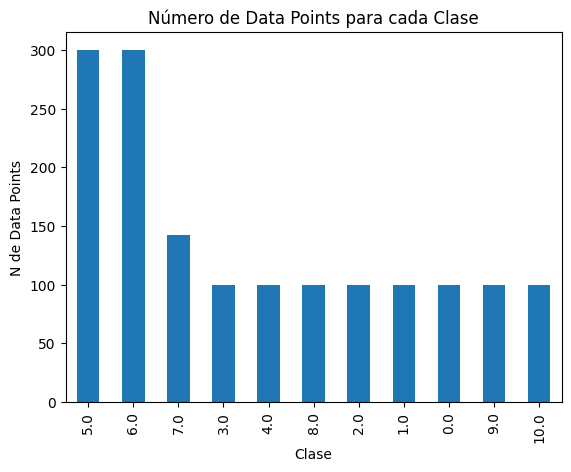

In [ ]:
n_datos_clases = df["quality"].value_counts()

# Plot the histogram
n_datos_clases.plot(kind='bar')
plt.xlabel('Clase')
plt.ylabel('N de Data Points')
plt.title('Número de Data Points para cada Clase')
plt.show()

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
projection_tsne = tsne.fit_transform(df.iloc[:,:-1])

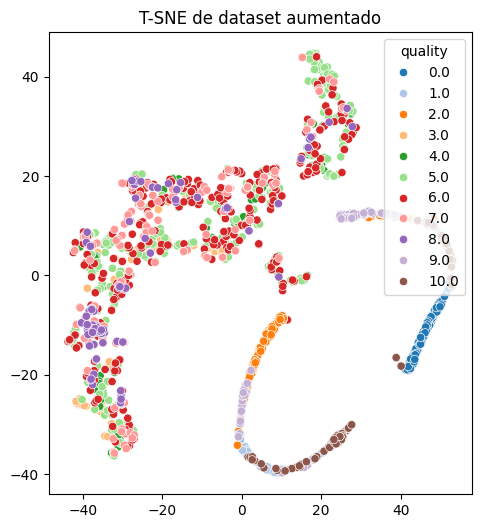

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=projection_tsne[:, 0], y=projection_tsne[:, 1], hue=df.iloc[:,-1], palette=sns.color_palette("tab20", 11))
plt.title('T-SNE de dataset aumentado')
plt.show()

In [ ]:
tsne2 = TSNE(n_components=2, perplexity=30, random_state=42)
projection_tsne2 = tsne2.fit_transform(df_copia.iloc[:,:-1])

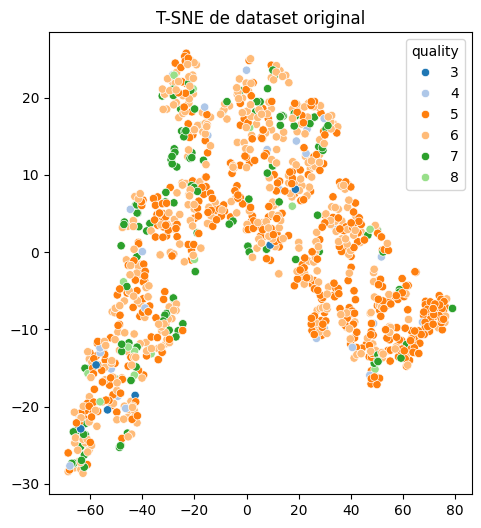

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=projection_tsne2[:, 0], y=projection_tsne2[:, 1], hue=df_copia.iloc[:,-1], palette=sns.color_palette("tab20", 6))
plt.title('T-SNE de dataset original')
plt.show()

Text(0, 0.5, 'citric acid')

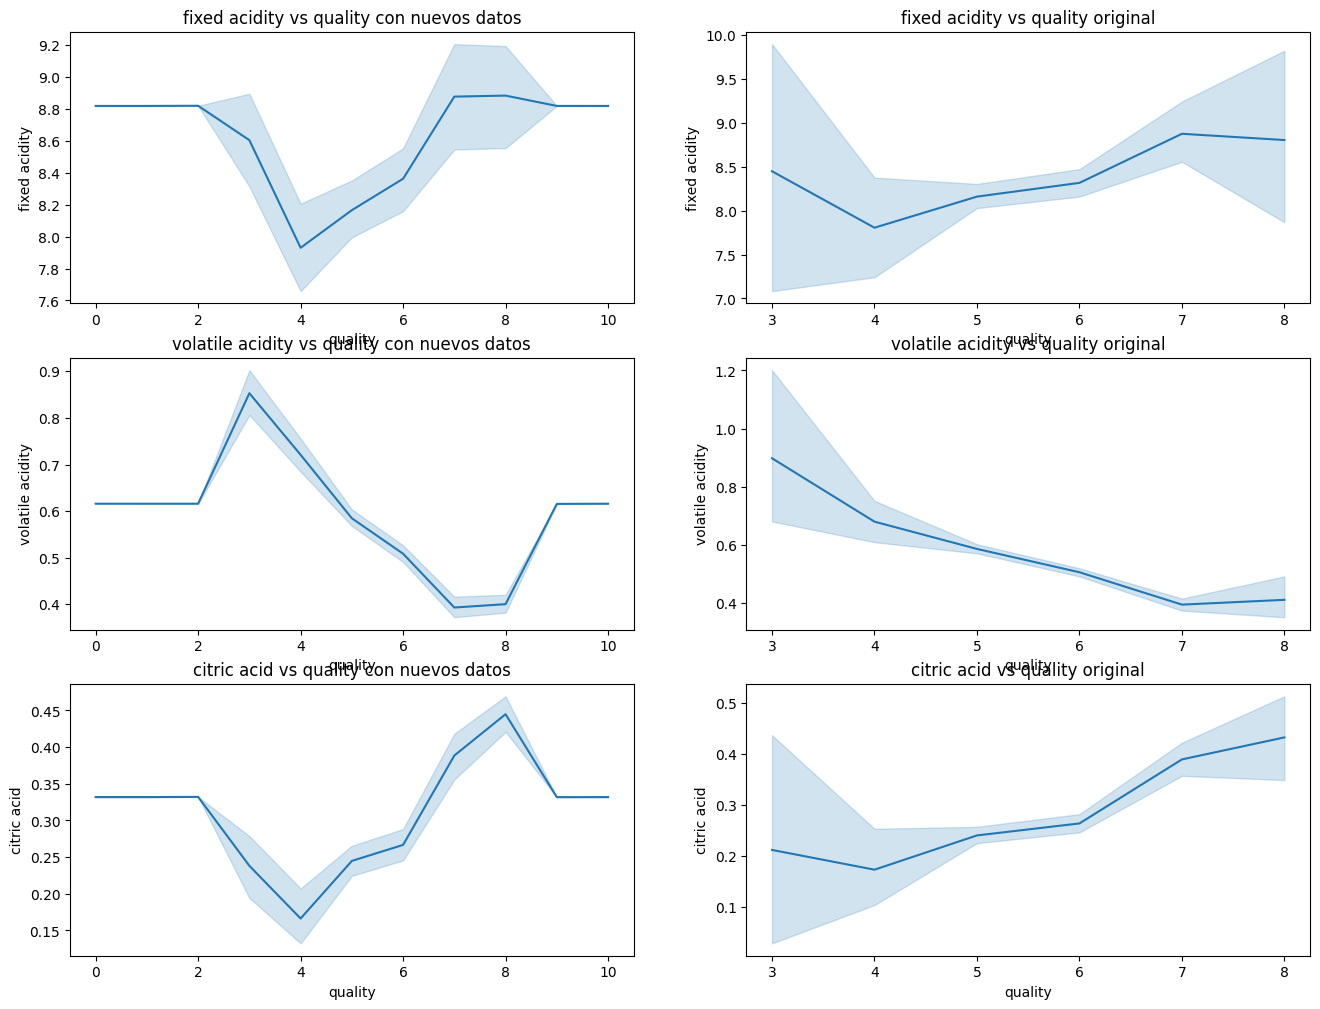

In [ ]:
# Modificaciones
fig, axs = plt.subplots(3, 2, figsize=(16, 12))

sns.lineplot(x="quality", y="fixed acidity", data=df, ax=axs[0, 0])
axs[0, 0].set_title('fixed acidity vs quality con nuevos datos')
axs[0, 0].set_xlabel('quality')
axs[0, 0].set_ylabel('fixed acidity')

sns.lineplot(x="quality", y="fixed acidity", data=df_copia, ax=axs[0, 1])
axs[0, 1].set_title('fixed acidity vs quality original')
axs[0, 1].set_xlabel('quality')
axs[0, 1].set_ylabel('fixed acidity')

sns.lineplot(x="quality", y="volatile acidity", data=df, ax=axs[1, 0])
axs[1, 0].set_title('volatile acidity vs quality con nuevos datos')
axs[1, 0].set_xlabel('quality')
axs[1, 0].set_ylabel('volatile acidity')

sns.lineplot(x="quality", y="volatile acidity", data=df_copia, ax=axs[1, 1])
axs[1, 1].set_title('volatile acidity vs quality original')
axs[1, 1].set_xlabel('quality')
axs[1, 1].set_ylabel('volatile acidity')

sns.lineplot(x="quality", y="citric acid", data=df, ax=axs[2, 0])
axs[2, 0].set_title('citric acid vs quality con nuevos datos')
axs[2, 0].set_xlabel('quality')
axs[2, 0].set_ylabel('citric acid')

sns.lineplot(x="quality", y="citric acid", data=df_copia, ax=axs[2, 1])
axs[2, 1].set_title('citric acid vs quality original')
axs[2, 1].set_xlabel('quality')
axs[2, 1].set_ylabel('citric acid')

Text(0, 0.5, 'free sulfur dioxide')

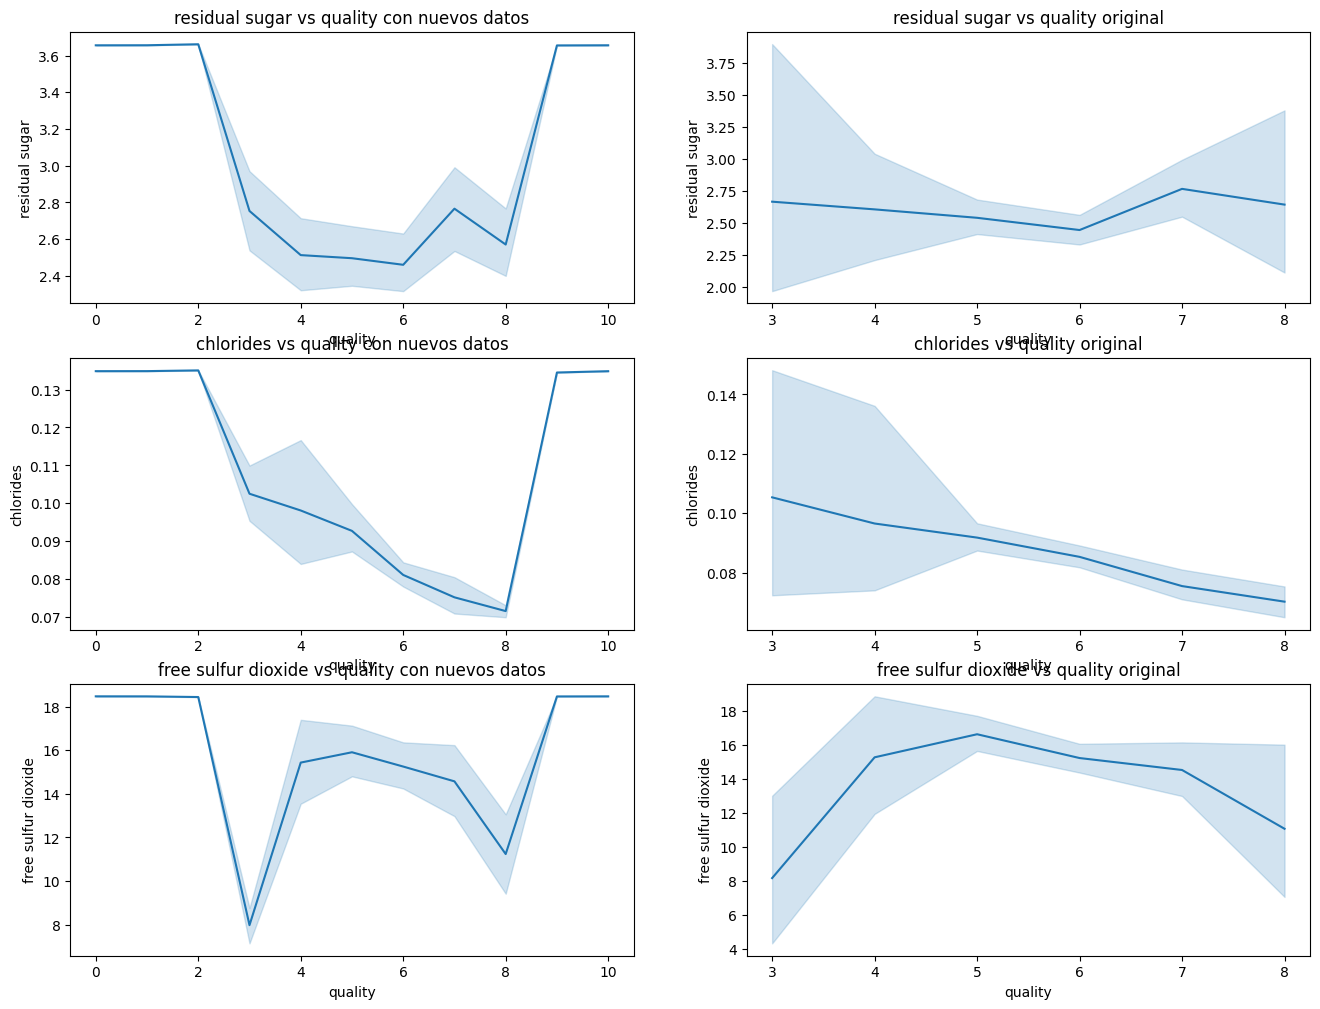

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(16, 12))

sns.lineplot(x="quality", y="residual sugar", data=df, ax=axs[0, 0])
axs[0, 0].set_title('residual sugar vs quality con nuevos datos')
axs[0, 0].set_xlabel('quality')
axs[0, 0].set_ylabel('residual sugar')

sns.lineplot(x="quality", y="residual sugar", data=df_copia, ax=axs[0, 1])
axs[0, 1].set_title('residual sugar vs quality original')
axs[0, 1].set_xlabel('quality')
axs[0, 1].set_ylabel('residual sugar')

sns.lineplot(x="quality", y="chlorides", data=df, ax=axs[1, 0])
axs[1, 0].set_title('chlorides vs quality con nuevos datos')
axs[1, 0].set_xlabel('quality')
axs[1, 0].set_ylabel('chlorides')

sns.lineplot(x="quality", y="chlorides", data=df_copia, ax=axs[1, 1])
axs[1, 1].set_title('chlorides vs quality original')
axs[1, 1].set_xlabel('quality')
axs[1, 1].set_ylabel('chlorides')

sns.lineplot(x="quality", y="free sulfur dioxide", data=df, ax=axs[2, 0])
axs[2, 0].set_title('free sulfur dioxide vs quality con nuevos datos')
axs[2, 0].set_xlabel('quality')
axs[2, 0].set_ylabel('free sulfur dioxide')

sns.lineplot(x="quality", y="free sulfur dioxide", data=df_copia, ax=axs[2, 1])
axs[2, 1].set_title('free sulfur dioxide vs quality original')
axs[2, 1].set_xlabel('quality')
axs[2, 1].set_ylabel('free sulfur dioxide')

Text(0, 0.5, 'pH')

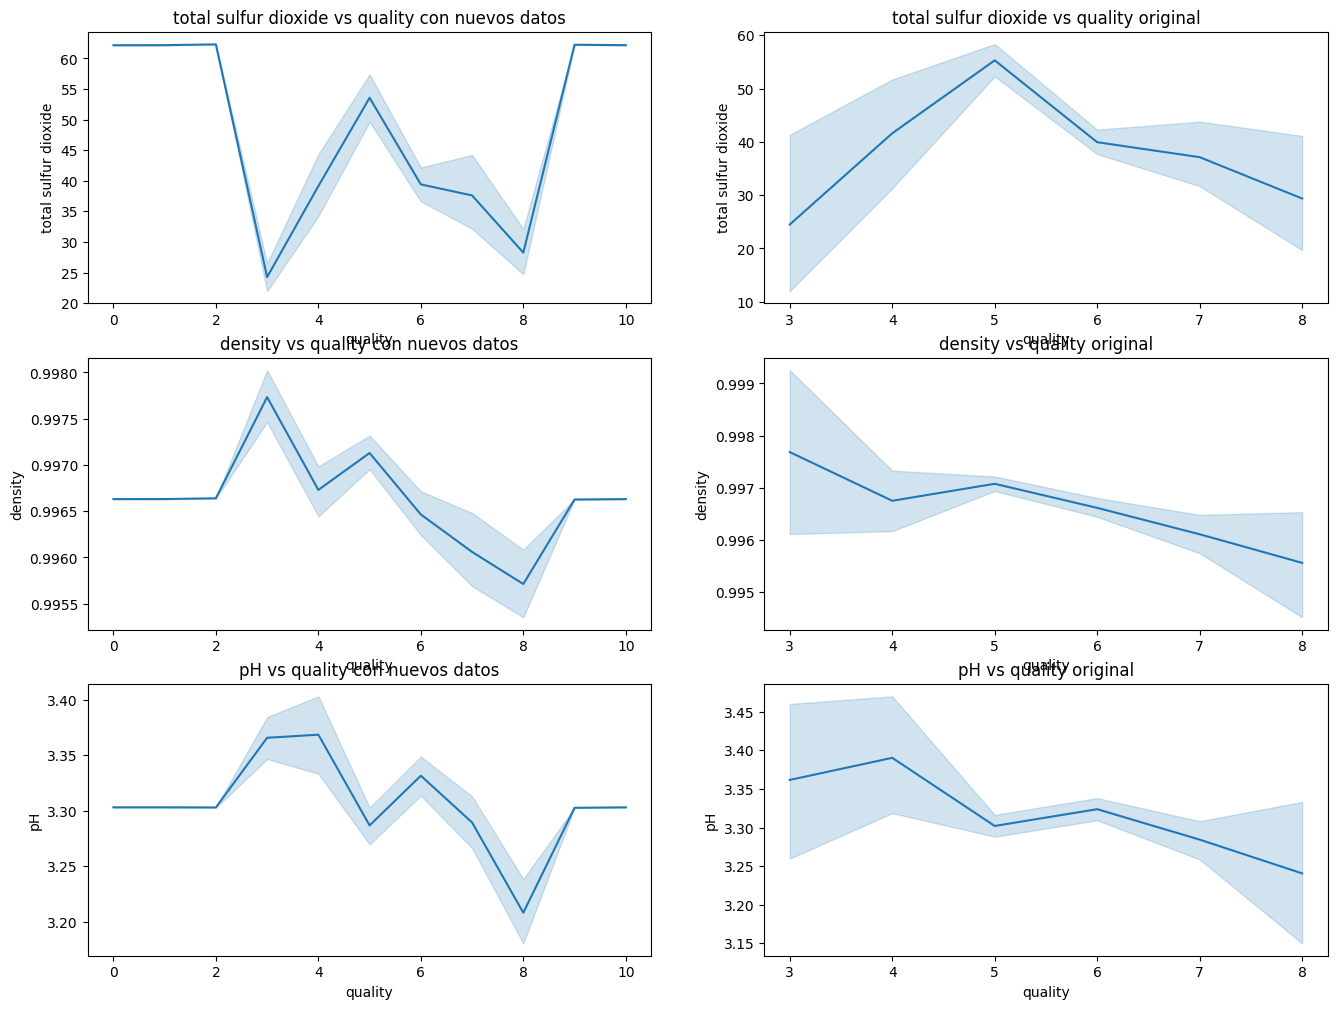

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(16, 12))

sns.lineplot(x="quality", y="total sulfur dioxide", data=df, ax=axs[0, 0])
axs[0, 0].set_title('total sulfur dioxide vs quality con nuevos datos')
axs[0, 0].set_xlabel('quality')
axs[0, 0].set_ylabel('total sulfur dioxide')

sns.lineplot(x="quality", y="total sulfur dioxide", data=df_copia, ax=axs[0, 1])
axs[0, 1].set_title('total sulfur dioxide vs quality original')
axs[0, 1].set_xlabel('quality')
axs[0, 1].set_ylabel('total sulfur dioxide')

sns.lineplot(x="quality", y="density", data=df, ax=axs[1, 0])
axs[1, 0].set_title('density vs quality con nuevos datos')
axs[1, 0].set_xlabel('quality')
axs[1, 0].set_ylabel('density')

sns.lineplot(x="quality", y="density", data=df_copia, ax=axs[1, 1])
axs[1, 1].set_title('density vs quality original')
axs[1, 1].set_xlabel('quality')
axs[1, 1].set_ylabel('density')

sns.lineplot(x="quality", y="pH", data=df, ax=axs[2, 0])
axs[2, 0].set_title('pH vs quality con nuevos datos')
axs[2, 0].set_xlabel('quality')
axs[2, 0].set_ylabel('pH')

sns.lineplot(x="quality", y="pH", data=df_copia, ax=axs[2, 1])
axs[2, 1].set_title('pH vs quality original')
axs[2, 1].set_xlabel('quality')
axs[2, 1].set_ylabel('pH')

Text(0, 0.5, 'alcohol')

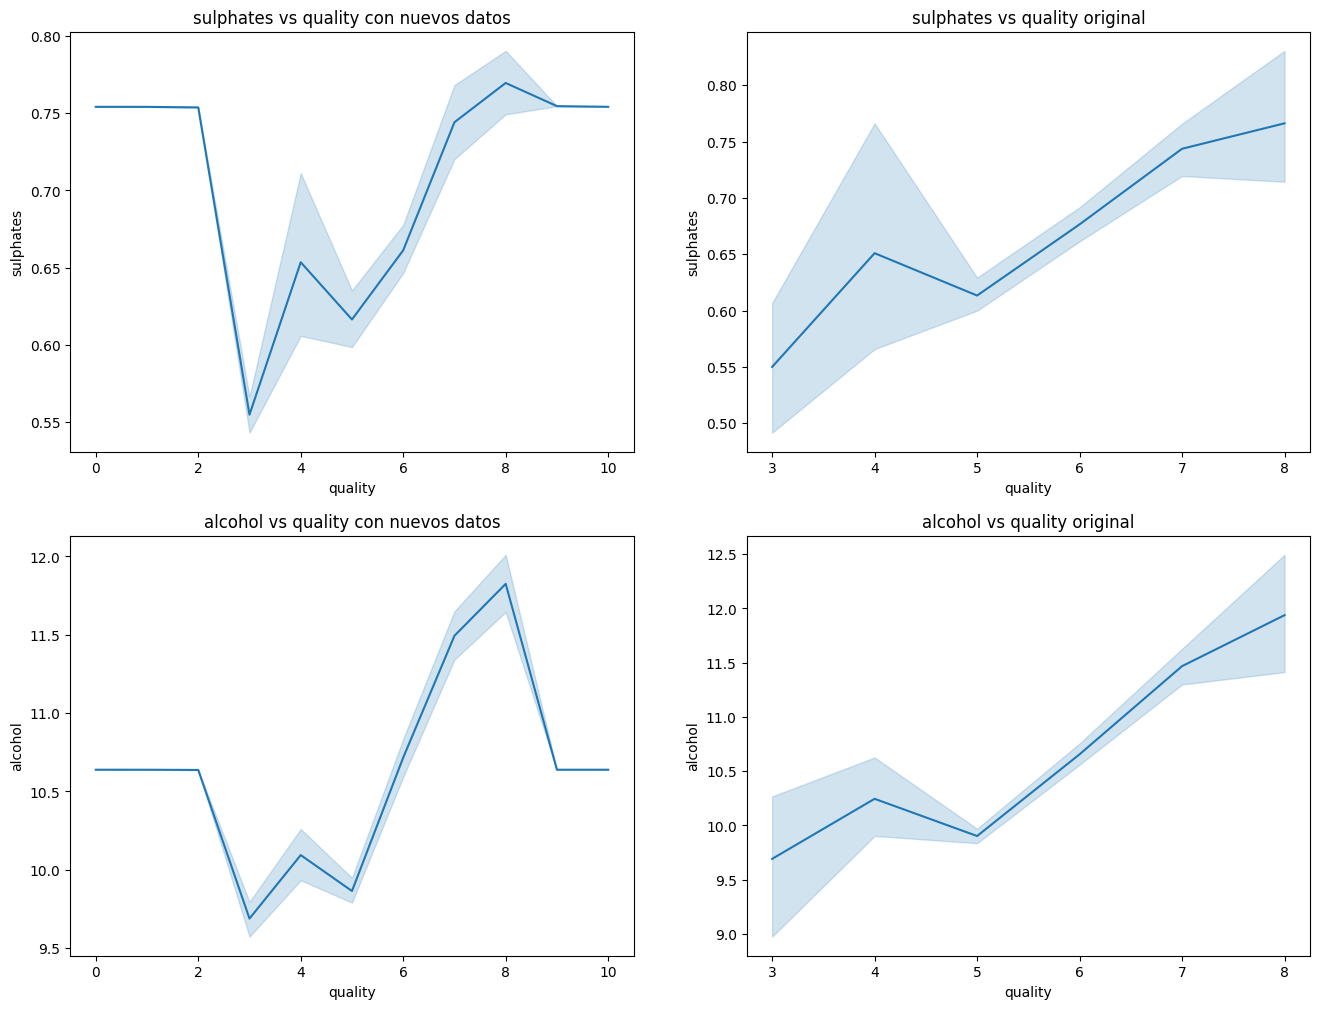

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

sns.lineplot(x="quality", y="sulphates", data=df, ax=axs[0, 0])
axs[0, 0].set_title('sulphates vs quality con nuevos datos')
axs[0, 0].set_xlabel('quality')
axs[0, 0].set_ylabel('sulphates')

sns.lineplot(x="quality", y="sulphates", data=df_copia, ax=axs[0, 1])
axs[0, 1].set_title('sulphates vs quality original')
axs[0, 1].set_xlabel('quality')
axs[0, 1].set_ylabel('sulphates')

sns.lineplot(x="quality", y="alcohol", data=df, ax=axs[1, 0])
axs[1, 0].set_title('alcohol vs quality con nuevos datos')
axs[1, 0].set_xlabel('quality')
axs[1, 0].set_ylabel('alcohol')

sns.lineplot(x="quality", y="alcohol", data=df_copia, ax=axs[1, 1])
axs[1, 1].set_title('alcohol vs quality original')
axs[1, 1].set_xlabel('quality')
axs[1, 1].set_ylabel('alcohol')

## Redes Bayesianas

Discretizamos la data para tener mejores resultados (Chen, Yi-Chun, Tim A. Wheeler, y Mykel J. Kochenderfer. 2017. «Learning Discrete Bayesian Networks From Continuous Data». Journal Of Artificial Intelligence Research/The Journal Of Artificial Intelligence Research 59 (junio): 103-32. https://doi.org/10.1613/jair.5371).

---



https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html

In [ ]:
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import BicScore

hc = HillClimbSearch(df)
best_model = hc.estimate(scoring_method=BicScore(df))
print(best_model.edges())

  0%|          | 0/1000000 [00:00<?, ?it/s]

[]


In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

variables = df.iloc[:, :-1]
target = df.iloc[:, -1]

discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
discretized_features = discretizer.fit_transform(variables)

df_discretizada = pd.DataFrame(discretized_features, columns=variables.columns)
df_discretizada['target'] = target.astype('category')

In [ ]:
hc = HillClimbSearch(df_discretizada)
best_model = hc.estimate(scoring_method=BicScore(df_discretizada))
print(best_model.edges())

  0%|          | 0/1000000 [00:00<?, ?it/s]

[('fixed acidity', 'pH'), ('fixed acidity', 'density'), ('citric acid', 'fixed acidity'), ('free sulfur dioxide', 'total sulfur dioxide'), ('density', 'residual sugar'), ('alcohol', 'density'), ('target', 'chlorides'), ('target', 'alcohol'), ('target', 'sulphates'), ('target', 'citric acid'), ('target', 'volatile acidity'), ('target', 'free sulfur dioxide')]


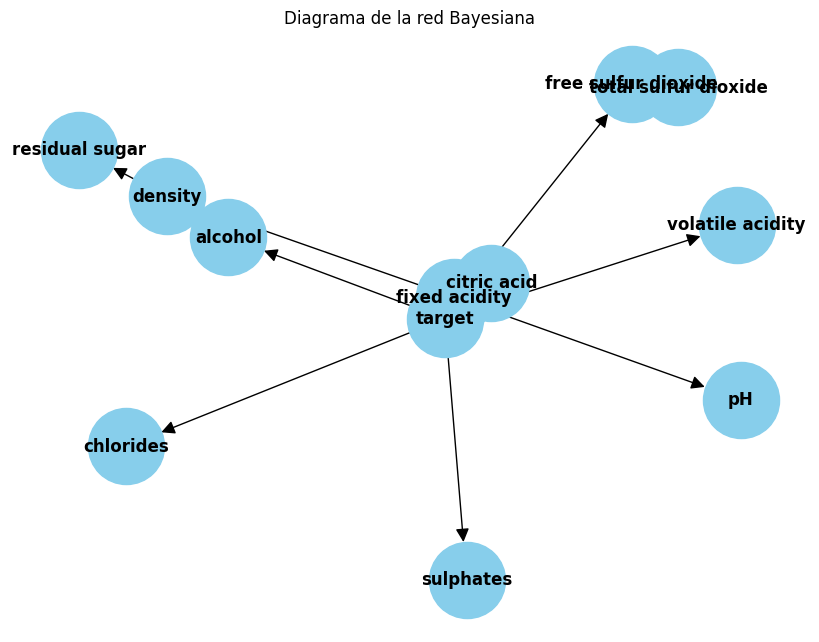

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

model = BayesianNetwork(best_model.edges())

graph = nx.DiGraph(model.edges())

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=12, font_weight="bold", arrowsize=20)
plt.title("Diagrama de la red Bayesiana")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_discretizada.iloc[:,:-1], df_discretizada.iloc[:,-1], test_size=0.2, random_state=42)

In [ ]:
from pgmpy.inference import VariableElimination

model.fit(df_discretizada, estimator=BayesianEstimator, prior_type="BDeu")

infer = VariableElimination(model)

print(infer.query(['target'], evidence={'residual sugar': 3, 'citric acid': 3, 'free sulfur dioxide': 1}))

+--------------+---------------+
| target       |   phi(target) |
+==============+===============+
| target(0.0)  |        0.0031 |
+--------------+---------------+
| target(1.0)  |        0.0031 |
+--------------+---------------+
| target(2.0)  |        0.0031 |
+--------------+---------------+
| target(3.0)  |        0.0195 |
+--------------+---------------+
| target(4.0)  |        0.0379 |
+--------------+---------------+
| target(5.0)  |        0.0850 |
+--------------+---------------+
| target(6.0)  |        0.2538 |
+--------------+---------------+
| target(7.0)  |        0.4056 |
+--------------+---------------+
| target(8.0)  |        0.1828 |
+--------------+---------------+
| target(9.0)  |        0.0031 |
+--------------+---------------+
| target(10.0) |        0.0031 |
+--------------+---------------+


Esto no sirve! Misma probbilidad que sea 0 o 10... no sirve redes bayesianas para este ej.

In [ ]:
# Select a random data point as evidence
evidence_index = random.randint(0, len(df_discretizada) - 1)
evidence = {df_discretizada.columns[i]: df_discretizada.iloc[evidence_index, i] for i in range(len(df_discretizada.columns) - 1)}

# Get the probabilities for each class given the evidence
inferred_probabilities = infer.query(['quality'], evidence=evidence)

# Print the inferred probabilities
print(inferred_probabilities)


## SVM

In [ ]:
X_original = df_copia.iloc[:,:-1]
y_original = df_copia.iloc[:,-1]

In [ ]:
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_original, y_original, test_size=0.3, random_state=109)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), LinearSVC())
clf.fit(X_train_original, y_train_original)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC())])

In [ ]:
from sklearn import metrics

y_pred_original = clf.predict(X_test_original)
print("Accuracy:",metrics.accuracy_score(y_test_original, y_pred_original))

Accuracy: 0.5877192982456141


In [ ]:
print("Original dataset classification report:")
print(metrics.classification_report(y_test_original, y_pred_original))

Original dataset classification report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         6
           5       0.68      0.77      0.72       146
           6       0.49      0.68      0.57       128
           7       1.00      0.04      0.07        55
           8       0.00      0.00      0.00         5

    accuracy                           0.59       342
   macro avg       0.36      0.25      0.23       342
weighted avg       0.64      0.59      0.53       342



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


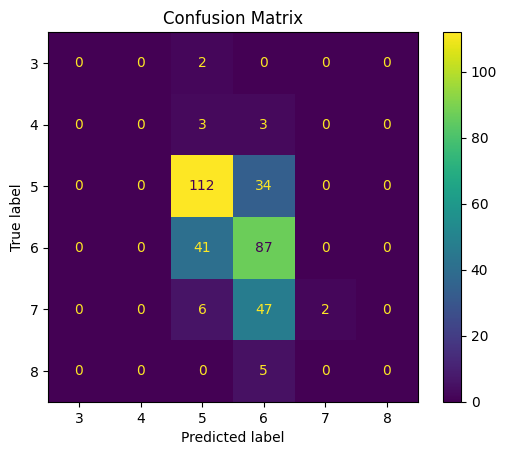

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_original, y_pred_original)
labels = [3, 4, 5, 6, 7, 8]
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
cm_display.plot()
plt.title('Confusion Matrix')
plt.show()

Ahora con el nuevo DATASET1

In [ ]:
X_aumentado = df.iloc[:,:-1]
y_aumentado = df.iloc[:,-1]

In [ ]:
X_train_aumentado, X_test_aumentado, y_train_aumentado, y_test_aumentado = train_test_split(X_aumentado, y_aumentado, test_size=0.3, random_state=109)

In [ ]:
clf_aumentado = make_pipeline(StandardScaler(), LinearSVC())
clf_aumentado.fit(X_train_aumentado, y_train_aumentado)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC())])

In [ ]:
from sklearn import metrics

y_pred_aumentado = clf_aumentado.predict(X_test_aumentado)
print("Accuracy:",metrics.accuracy_score(y_test_aumentado, y_pred_aumentado))

Accuracy: 0.4017278617710583


In [ ]:
print("Augmented dataset classification report:")
print(metrics.classification_report(y_test_aumentado, y_pred_aumentado))

Augmented dataset classification report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        35
         1.0       0.00      0.00      0.00        32
         2.0       0.16      1.00      0.28        25
         3.0       0.87      1.00      0.93        26
         4.0       0.80      0.13      0.23        30
         5.0       0.60      0.69      0.64        87
         6.0       0.44      0.45      0.44        94
         7.0       0.37      0.24      0.29        45
         8.0       0.39      0.64      0.49        28
         9.0       0.00      0.00      0.00        28
        10.0       0.00      0.00      0.00        33

    accuracy                           0.40       463
   macro avg       0.33      0.38      0.30       463
weighted avg       0.37      0.40      0.35       463



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


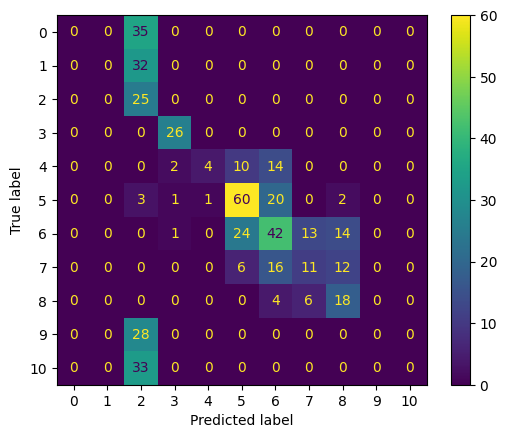

In [ ]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm_aumentado = confusion_matrix(y_test_aumentado, y_pred_aumentado)
cm_aumentado_display = metrics.ConfusionMatrixDisplay(cm_aumentado).plot()

Ahora predecimos la clase del dato con dos de clase 4 y uno de 7.

siete_features: el punto que sacamos al principio de la calidad: 7

In [ ]:
prediccion1 = clf.predict(siete_features)
print("Prediccion con modelo 1, dato calidad: 7:", prediccion1[0])
prediccion2 = clf_aumentado.predict(siete_features)
print("Prediccion con modelo 2, dato calidad: 7:", prediccion2[0])

Prediccion con modelo 1, dato calidad: 7: 6
Prediccion con modelo 2, dato calidad: 7: 7.0


In [ ]:
prediccion3 = clf.predict(cuatro_features)
print("Prediccion con modelo 1, dato calidad: 4:", prediccion3[0])
prediccion4 = clf_aumentado.predict(cuatro_features)
print("Prediccion con modelo 2, dato calidad: 4:", prediccion4[0])

Prediccion con modelo 1, dato calidad: 4: 5
Prediccion con modelo 2, dato calidad: 4: 5.0


In [ ]:
prediccion5 = clf.predict(cuatro_features2)
print("Prediccion con modelo 1, dato calidad: 4:", prediccion5[0])
prediccion6 = clf_aumentado.predict(cuatro_features2)
print("Prediccion con modelo 2, dato calidad: 4:", prediccion6[0])

Prediccion con modelo 1, dato calidad: 4: 6
Prediccion con modelo 2, dato calidad: 4: 7.0


## Neural Nets (MLP)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train_original, num_classes = 7)

IndexError: index 7 is out of bounds for axis 1 with size 7

In [ ]:
from keras.models import Model
from keras.layers import Dense, Embedding, Input

model = Sequential()
model.add(Dense(16, input_dim=11, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [ ]:
model.fit(X_train_original, y_train_original, batch_size=32, epochs=20, callbacks=[callback])

Epoch 1/20


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


In [ ]:
labels = df["quality"].unique()
labels = np.array([int(x) for x in labels])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Y_preds = model.predict(X_test).argmax(axis=-1)

print("Test Accuracy : {}".format(accuracy_score(y_test, Y_preds)))
print("\nClassification Report : ")
print(classification_report(y_test, Y_preds, target_names=labels))

In [ ]:
import itertools, matplotlib.pyplot as plt, numpy as np

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cnf_matrix = confusion_matrix(y_test, Y_preds)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure(figsize=(11, 11))
plot_confusion_matrix(cnf_matrix, classes=labels, normalize=True, title='Normalized confusion matrix')

plt.show()

## Multinomial Logistic Regression

##Otras aproximaciones (Support vector machine, XGBoost, DecisiontreeClassifier, u otras aproximaciones que estemos viendo en el curso)

**VMC**

# Generación de Datos Forma 2

In [ ]:
df2 = pd.read_csv("WineQT.csv")

In [ ]:
df2 = df2.drop("Id", axis=1)
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df2_copia = df2.copy()

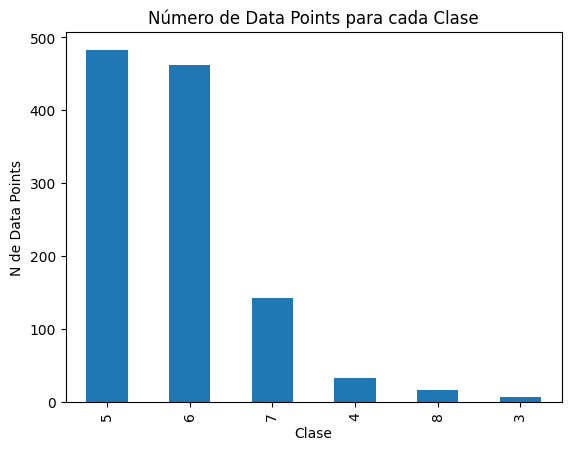

In [ ]:
n_datos_clases = df2["quality"].value_counts()

# Plot the histogram
n_datos_clases.plot(kind='bar')
plt.xlabel('Clase')
plt.ylabel('N de Data Points')
plt.title('Número de Data Points para cada Clase')
plt.show()

Separamos la variable objetivo del dataset, para lo que se crea X e y. Después, filtramos la data que nos va a servir para Luego creamos las particiones de X e y en train y test para utilizarlos en VAE.


In [ ]:
over = SMOTE(sampling_strategy={3: 100, 4: 100, 8: 100})
under = RandomUnderSampler(sampling_strategy={5: 300, 6: 300})
steps = [
    ('over', over),
    ('under', under)
]
pipeline = Pipeline(steps=steps)
X2, y2 = pipeline.fit_resample(df2.iloc[:,:-1], df2.iloc[:,-1])
df2 = pd.concat([X,y], axis=1)

In [ ]:
filtered_data2 = df[y.isin([3, 4, 7, 8])]
# X_filtered = filtered_data.drop("quality", axis=1)
# y_filtered = filtered_data["quality"]
X_filtered2 = df2.drop("quality", axis=1)
y_filtered2 = df2["quality"]

SMOTE Y UNDERSAMPLING

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)
X_train2, X_validacion2, y_train2, y_validacion2 = train_test_split(X_train2, y_train2, test_size=0.1, random_state=42)

In [ ]:
latent_dim = 2

# Encoder
encoder_inputs = layers.Input(shape=(X.shape[1],))
x2 = layers.Dense(64, activation='relu')(encoder_inputs)
z_mean = layers.Dense(latent_dim)(x2)
z_log_var = layers.Dense(latent_dim)(x2)

# Sampling
def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    return z_mean + tf.keras.backend.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Decoder
decoder_inputs = layers.Input(shape=(latent_dim,))
x2 = layers.Dense(64, activation='relu')(decoder_inputs)
decoder_outputs = layers.Dense(X.shape[1], activation='sigmoid')(x2)

# VAE model
encoder = models.Model(encoder_inputs, [z_mean, z_log_var, z])
decoder = models.Model(decoder_inputs, decoder_outputs)
vae_outputs = decoder(encoder(encoder_inputs)[2])
vae = models.Model(encoder_inputs, vae_outputs)

# VAE loss
reconstruction_loss = tf.keras.losses.mean_squared_error(encoder_inputs, vae_outputs)
reconstruction_loss *= df2.shape[1]
kl_loss = 1 + z_log_var - tf.keras.backend.square(z_mean) - tf.keras.backend.exp(z_log_var)
kl_loss = tf.keras.backend.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = tf.keras.backend.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')
vae.summary()

# Train VAE
vae.fit(X_train2, epochs=10, batch_size=32, validation_data=(X_validacion2, y_validacion2))

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 11)]                 0         []                            
                                                                                                  
 model (Functional)          [(None, 2),                  1028      ['input_1[0][0]']             
                              (None, 2),                                                          
                              (None, 2)]                                                          
                                                                                                  
 model_1 (Functional)        (None, 11)                   907       ['model[0][2]']               
                                                                                            

Escalamos la las variables por Standard Scaler.

In [ ]:
#standard_scaler = preprocessing.StandardScaler()
min_max = preprocessing.MinMaxScaler()
X_scaled2 = min_max.fit_transform(X2)

Aplicamos SLERP

In [ ]:
from scipy.spatial.distance import cdist

def slerp(val, low, high):
    omega = np.arccos(np.clip(np.dot(low / np.linalg.norm(low), high / np.linalg.norm(high)), -1, 1))
    so = np.sin(omega)
    if so == 0:
        return (1.0 - val) * low + val * high
    return np.sin((1.0 - val) * omega) / so * low + np.sin(val * omega) / so * high

z_mean, _, _ = encoder.predict(X_scaled2) #X_filtered2

def generate_data(class_1, class_2, num_samples, target_class_label):
    idx_1 = np.where(y_filtered2 == class_1)[0] #y_filtered2
    idx_2 = np.where(y_filtered2 == class_2)[0]  #y_filtered2

    z_1 = z_mean[idx_1]
    z_2 = z_mean[idx_2]

    new_data = []
    for _ in range(num_samples):
        idx1 = np.random.choice(len(z_1))
        idx2 = np.random.choice(len(z_2))
        val = np.random.uniform(0.25, 0.75)
        #z_sample = slerp(np.random.rand(), z_1[idx1], z_2[idx2])
        z_sample = slerp(val, z_1[idx1], z_2[idx2])
        generated_sample = decoder.predict(np.array([z_sample]))[0]
        new_data.append(generated_sample)

    new_data = min_max.inverse_transform(new_data)
    new_labels = [target_class_label] * num_samples
    return np.array(new_data), np.array(new_labels)


X_new = X_scaled2.copy()
y_new = y_filtered2.copy()
    # Generate data for class 2
new_data_2, new_labels_2 = generate_data(3, 4, 10, 2)
X_new = np.vstack([X_new, min_max.transform(new_data_2)])
y_new = np.hstack([y_new, new_labels_2])

# Update the filtered data
y_filtered2 = np.hstack([y_filtered2, new_labels_2])
X_filtered2 = np.vstack([X_filtered2, new_data_2])
X_scaled2 = min_max.fit_transform(X_filtered2)
z_mean, _, _ = encoder.predict(X_scaled2)


# Generate data for class 1
new_data_1, new_labels_1 = generate_data(2, 3, 10, 1)
X_new = np.vstack([X_new, min_max.transform(new_data_1)])
y_new = np.hstack([y_new, new_labels_1])

# Update the filtered data
y_filtered2 = np.hstack([y_filtered2, new_labels_1])
X_filtered2 = np.vstack([X_filtered2, new_data_1])
X_scaled2 = min_max.fit_transform(X_filtered2)
z_mean, _, _ = encoder.predict(X_scaled2)

# Generate data for class 0
new_data_0, new_labels_0 = generate_data(1, 2, 10, 0)
X_new = np.vstack([X_new, min_max.transform(new_data_0)])
y_new = np.hstack([y_new, new_labels_0])

# Update the filtered data
y_filtered2 = np.hstack([y_filtered2, new_labels_0])
X_filtered2 = np.vstack([X_filtered2, new_data_0])
X_scaled2 = min_max.fit_transform(X_filtered2)
z_mean, _, _ = encoder.predict(X_scaled2)

# Generate data for class 9
new_data_9, new_labels_9 = generate_data(7, 8, 10, 9)
X_new = np.vstack([X_new, min_max.transform(new_data_9)])
y_new = np.hstack([y_new, new_labels_9])

# Update the filtered data
y_filtered2 = np.hstack([y_filtered2, new_labels_9])
X_filtered2 = np.vstack([X_filtered2, new_data_9])
X_scaled2 = min_max.fit_transform(X_filtered2)
z_mean, _, _ = encoder.predict(X_scaled2)

# Generate data for class 10
new_data_10, new_labels_10 = generate_data(8, 9, 10, 10)
X_new = np.vstack([X_new, min_max.transform(new_data_10)])
y_new = np.hstack([y_new, new_labels_10])

33/33 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step


34/34 [==============================] - 0s 4ms/step


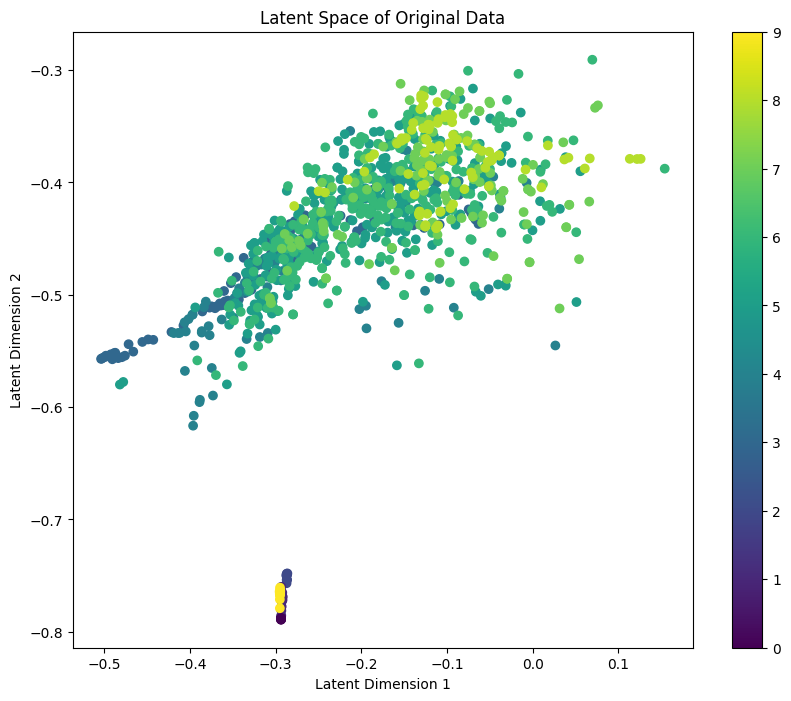

In [ ]:
def plot_latent_space(encoder, data, labels, title):
    z_mean, _, _ = encoder.predict(data)
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels, cmap='viridis')
    plt.colorbar(scatter)
    plt.xlabel('Latent Dimension 1')
    plt.ylabel('Latent Dimension 2')
    plt.title(title)
    plt.show()

plot_latent_space(encoder, X_scaled2, y_filtered2, "Latent Space of Original Data")

In [ ]:
for data_2 in new_data_2:
  qual = np.append(data_2, [2])
  df2.loc[len(df2.index)] = qual

for data_1 in new_data_1:
  qual = np.append(data_1, [1])
  df2.loc[len(df2.index)] = qual

for data_0 in new_data_0:
  qual = np.append(data_0, [0])
  df2.loc[len(df2.index)] = qual

for data_9 in new_data_9:
  qual = np.append(data_9, [9])
  df2.loc[len(df2.index)] = qual

for data_10 in new_data_10:
  qual = np.append(data_10, [10])
  df2.loc[len(df2.index)] = qual

Oversampling de las clases generadas

In [ ]:
over = SMOTE(sampling_strategy={0: 100, 1: 100, 2: 100, 9: 100, 10: 100})
X, y = over.fit_resample(df2.iloc[:,:-1], df2.iloc[:,-1])

In [ ]:
df2 = pd.concat([X,y], axis=1)

(https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)

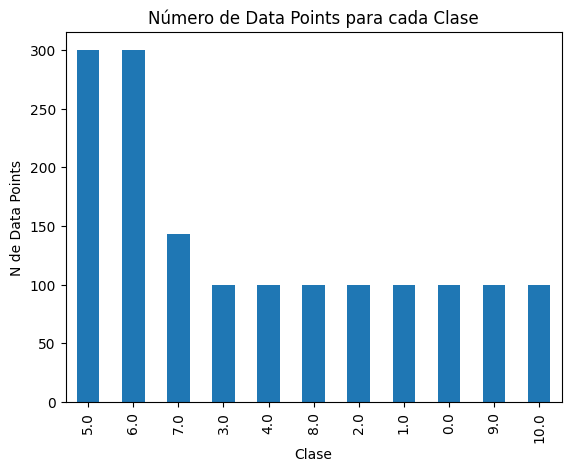

In [ ]:
n_datos_clases = df2["quality"].value_counts()

# Plot the histogram
n_datos_clases.plot(kind='bar')
plt.xlabel('Clase')
plt.ylabel('N de Data Points')
plt.title('Número de Data Points para cada Clase')
plt.show()

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
projection_tsne = tsne.fit_transform(df2.iloc[:,:-1])


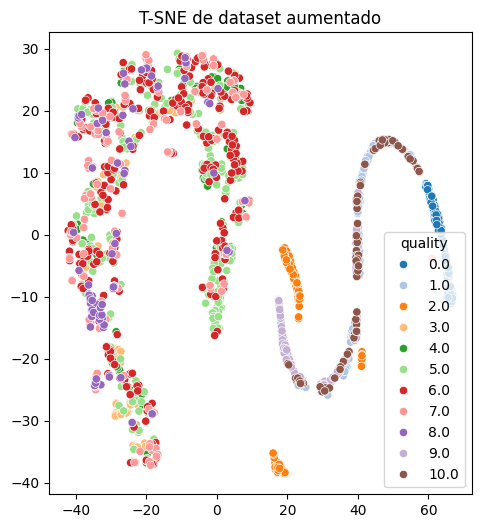

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=projection_tsne[:, 0], y=projection_tsne[:, 1], hue=df2.iloc[:,-1], palette=sns.color_palette("tab20", 11))
plt.title('T-SNE de dataset aumentado')
plt.show()

In [ ]:
tsne2 = TSNE(n_components=2, perplexity=30, random_state=42)
projection_tsne2 = tsne2.fit_transform(df_copia.iloc[:,:-1])

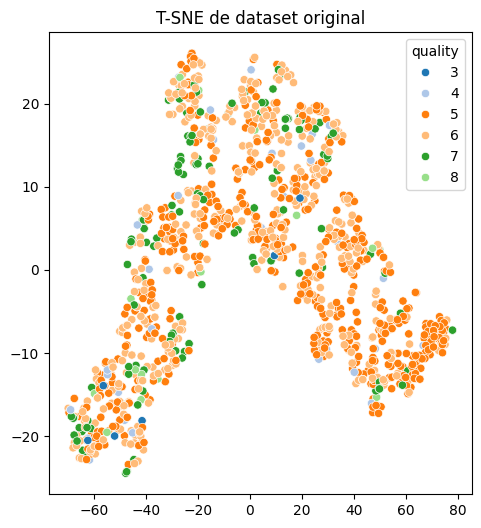

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=projection_tsne2[:, 0], y=projection_tsne2[:, 1], hue=df_copia.iloc[:,-1], palette=sns.color_palette("tab20", 6))
plt.title('T-SNE de dataset original')
plt.show()

## Redes Bayesianas

Discretizamos la data para tener mejores resultados (Chen, Yi-Chun, Tim A. Wheeler, y Mykel J. Kochenderfer. 2017. «Learning Discrete Bayesian Networks From Continuous Data». Journal Of Artificial Intelligence Research/The Journal Of Artificial Intelligence Research 59 (junio): 103-32. https://doi.org/10.1613/jair.5371).

---



https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html

In [ ]:
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import BicScore

hc = HillClimbSearch(df2)
best_model = hc.estimate(scoring_method=BicScore(df2))
print(best_model.edges())

  0%|          | 0/1000000 [00:00<?, ?it/s]

[]


In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

variables = df2.iloc[:, :-1]
target = df2.iloc[:, -1]

discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
discretized_features = discretizer.fit_transform(variables)

df_discretizada = pd.DataFrame(discretized_features, columns=variables.columns)
df_discretizada['target'] = target.astype('category')

In [ ]:
hc = HillClimbSearch(df_discretizada)
best_model = hc.estimate(scoring_method=BicScore(df_discretizada))
print(best_model.edges())

  0%|          | 0/1000000 [00:00<?, ?it/s]

[('fixed acidity', 'pH'), ('fixed acidity', 'density'), ('fixed acidity', 'citric acid'), ('total sulfur dioxide', 'free sulfur dioxide'), ('total sulfur dioxide', 'fixed acidity'), ('total sulfur dioxide', 'residual sugar'), ('total sulfur dioxide', 'chlorides'), ('sulphates', 'target'), ('target', 'total sulfur dioxide'), ('target', 'alcohol'), ('target', 'volatile acidity')]


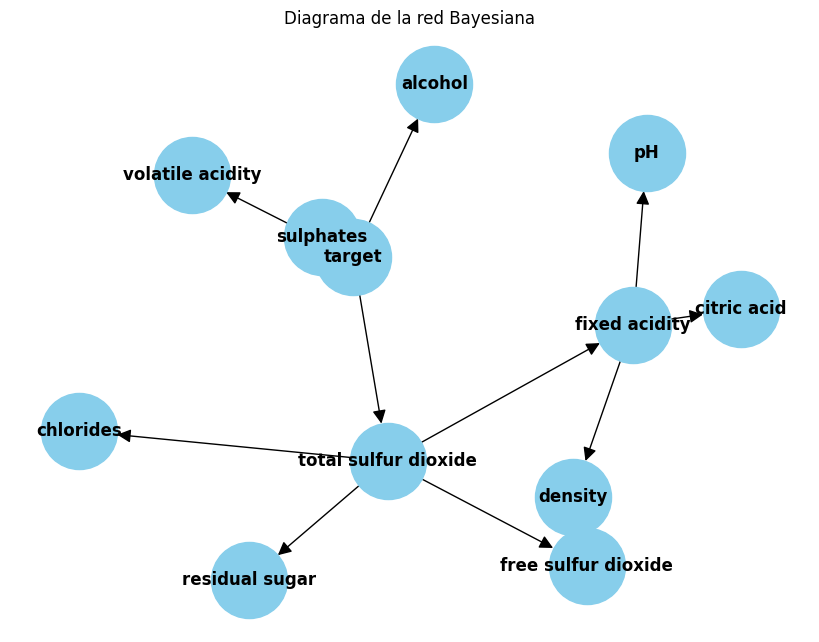

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# model = BayesianNetwork([('fixed acidity', 'density'), ('fixed acidity', 'pH'), ('citric acid', 'fixed acidity'), ('total sulfur dioxide', 'free sulfur dioxide'), ('density', 'target'), ('target', 'alcohol'), ('target', 'residual sugar'), ('target', 'total sulfur dioxide'), ('target', 'sulphates'), ('target', 'volatile acidity')])
model = BayesianNetwork(best_model.edges())
graph = nx.DiGraph(model.edges())

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=12, font_weight="bold", arrowsize=20)
plt.title("Diagrama de la red Bayesiana")
plt.show()

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_discretizada.iloc[:,:-1], df_discretizada.iloc[:,-1], test_size=0.2, random_state=42)

In [ ]:
from pgmpy.inference import VariableElimination

model.fit(df_discretizada, estimator=BayesianEstimator, prior_type="BDeu")

infer = VariableElimination(model)

print(infer.query(['target'], evidence={'residual sugar': 2, 'citric acid': 2, 'free sulfur dioxide': 1}))

+--------------+---------------+
| target       |   phi(target) |
+==============+===============+
| target(0.0)  |        0.0041 |
+--------------+---------------+
| target(1.0)  |        0.0022 |
+--------------+---------------+
| target(2.0)  |        0.0016 |
+--------------+---------------+
| target(3.0)  |        0.0172 |
+--------------+---------------+
| target(4.0)  |        0.0890 |
+--------------+---------------+
| target(5.0)  |        0.5906 |
+--------------+---------------+
| target(6.0)  |        0.2036 |
+--------------+---------------+
| target(7.0)  |        0.0595 |
+--------------+---------------+
| target(8.0)  |        0.0282 |
+--------------+---------------+
| target(9.0)  |        0.0016 |
+--------------+---------------+
| target(10.0) |        0.0024 |
+--------------+---------------+


## Neural Nets (MLP)